In [8]:
%pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Vérification de la fiabilité de la prédeiction

In [10]:
parties_du_corps=["Bassin","HancheD","GenouD","ChevilleD","HancheG","GenouG","ChevilleG","Colonne","Thorax","Cou","Tete","EpauleG","CoudeG","PoignetG","EpauleD","CoudeD","PoignetD"]
path="./data/points"
points = os.listdir(path)
points = [f for f in points if os.path.isfile(os.path.join(path, f))]
scores=[]
for ele in points:
    df=pd.DataFrame(pd.read_json(os.path.join(path, ele))['instances'].str[0].str.get('keypoint_scores').to_list())
    df.columns=parties_du_corps
    scores.append(df)

In [11]:
for i in range(len(scores)):
    minimum=scores[i].min()
    for i in range(17): # 17 ? -> len(parties_du_corps), @JulienLEFEBV ?
        if minimum[i]!=1:
            print(i)

/tmp/ipykernel_17069/2341649110.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if minimum[i]!=1:


On peut voir que l'ia de détection des points a toujours été sûre d'elle lors des prédictions de points. Donc toute les données sont utilisables.

# Recupération des points

In [38]:
parties_du_corps=["Bassin","HancheD","GenouD","ChevilleD","HancheG","GenouG","ChevilleG","Colonne","Thorax","Cou","Tete","EpauleG","CoudeG","PoignetG","EpauleD","CoudeD","PoignetD"]
path="./data/points"
points = os.listdir(path)
points = [f for f in points if os.path.isfile(os.path.join(path, f))]
datas=[]
for ele in points:
    df=pd.DataFrame(pd.read_json(os.path.join(path, ele))['instances'].str[0].str.get('keypoints').to_list())
    df.columns=parties_du_corps
    datas.append(df)
    

In [40]:
datas[0].describe()
V1 = datas[0]

## Courbe des trajectoires Trajectoires

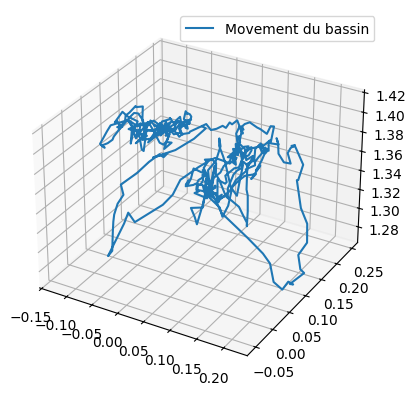

In [50]:

ax = plt.figure().add_subplot(projection='3d')

X = datas[1]

x = [pt[0] for pt in X["Tete"]]
y = [pt[1] for pt in X["Tete"]]
z = [pt[2] for pt in X["Tete"]]

ax.plot(x,y,z, label='Movement du bassin')
ax.legend()

plt.show()


# Moyennes

In [14]:
moyennes_x=[]
moyennes_y=[]
moyennes_z=[]
for i in range(17):
    moyennes_x_temp=[]
    moyennes_y_temp=[]
    moyennes_z_temp=[]
    for j in range(len(datas)):
        moyennes_x_temp.append(datas[j][parties_du_corps[i]].str[0].mean())
        moyennes_y_temp.append(datas[j][parties_du_corps[i]].str[1].mean())
        moyennes_z_temp.append(datas[j][parties_du_corps[i]].str[2].mean())
    moyennes_x.append(moyennes_x_temp)
    moyennes_y.append(moyennes_y_temp)
    moyennes_z.append(moyennes_z_temp)

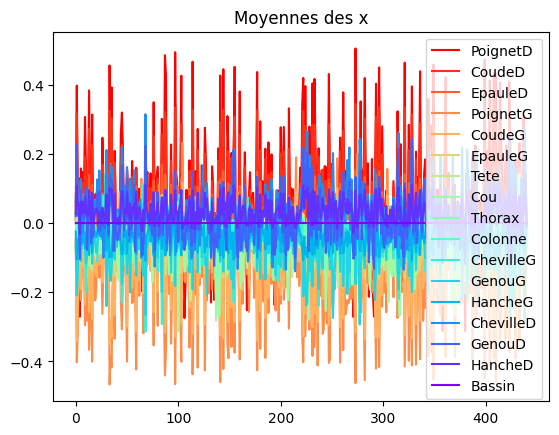

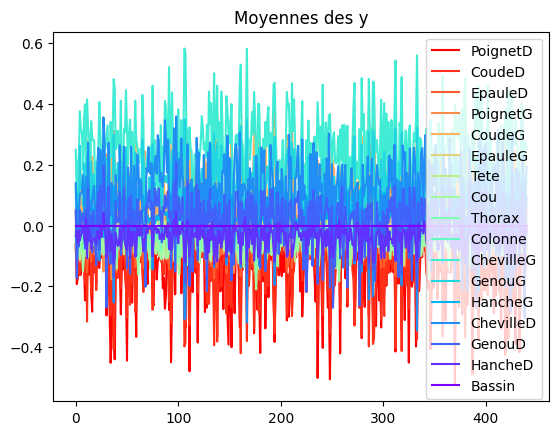

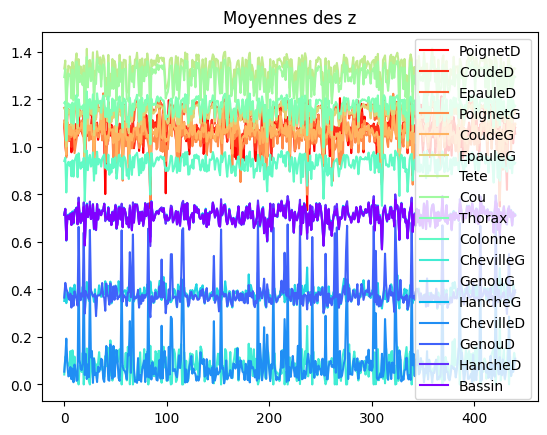

In [15]:
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, 17)]

for i in range(16,-1,-1):
    plt.plot(moyennes_x[i],label=parties_du_corps[i],color=colors[i])
plt.title("Moyennes des x")
plt.legend()
plt.show()
for i in range(16,-1,-1):
    plt.plot(moyennes_y[i],label=parties_du_corps[i],color=colors[i])
plt.title("Moyennes des y")
plt.legend()
plt.show()
for i in range(16,-1,-1):
    plt.plot(moyennes_z[i],label=parties_du_corps[i],color=colors[i])
plt.title("Moyennes des z")
plt.legend()
plt.show()


In [16]:
affichage_partie_du_corps=""
for i,ele in enumerate(parties_du_corps):
    affichage_partie_du_corps+=str(i+1)+" : "+ele+", "

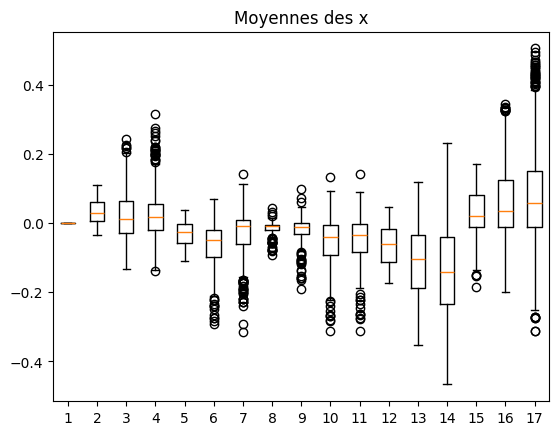

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


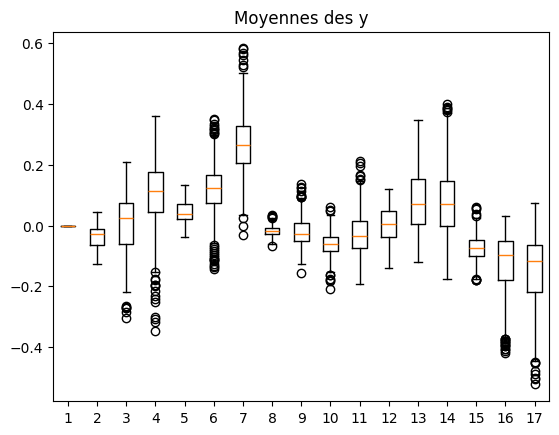

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


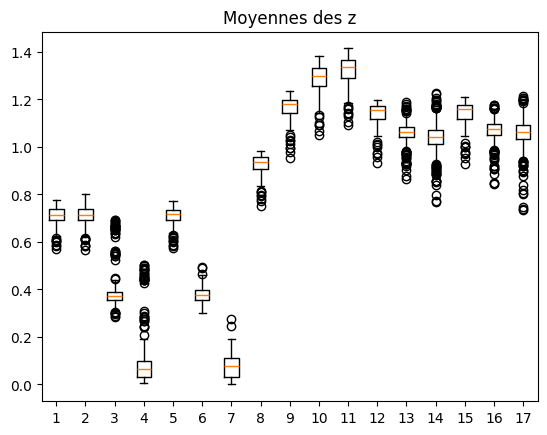

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


In [17]:
plt.boxplot(moyennes_x)
plt.title("Moyennes des x")
plt.show()
print(affichage_partie_du_corps)
plt.title("Moyennes des y")
plt.boxplot(moyennes_y)
plt.show()
print(affichage_partie_du_corps)
plt.title("Moyennes des z")
plt.boxplot(moyennes_z)
plt.show()
print(affichage_partie_du_corps)

On peut voir que l'on a des parties qui sont plus stables que d'autres sur l'ensemble de notre data set par exemple on peut voir que les poignets varient beaucoup plus que le thorax par exemple d'une video a une autre. On peut aussi voir que les hauteurs ne varient pas trop par exemple la tête reste bien en haut et les chevilles en bas. Aussi on remarque que le bassin ne bouge pas sur les axes x et y et reste en (0,0) donc on en déduit qu'il est l'origine des coordonnées x et y.

# Ecart types

In [18]:
ecarts_types_x=[]
ecarts_types_y=[]
ecarts_types_z=[]
for i in range(17):
    ecarts_types_x_temp=[]
    ecarts_types_y_temp=[]
    ecarts_types_z_temp=[]
    for j in range(len(datas)):
        ecarts_types_x_temp.append(datas[j][parties_du_corps[i]].str[0].std())
        ecarts_types_y_temp.append(datas[j][parties_du_corps[i]].str[1].std())
        ecarts_types_z_temp.append(datas[j][parties_du_corps[i]].str[2].std())
    ecarts_types_x.append(ecarts_types_x_temp)
    ecarts_types_y.append(ecarts_types_y_temp)
    ecarts_types_z.append(ecarts_types_z_temp)

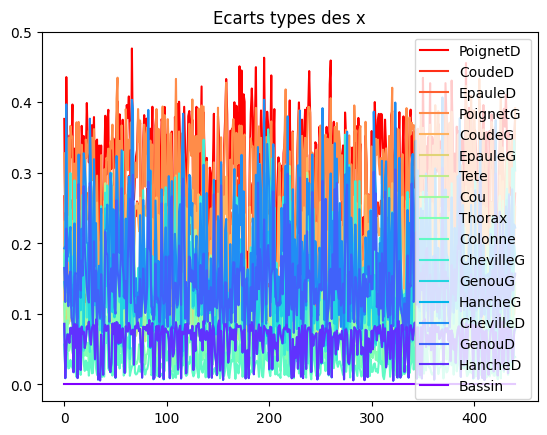

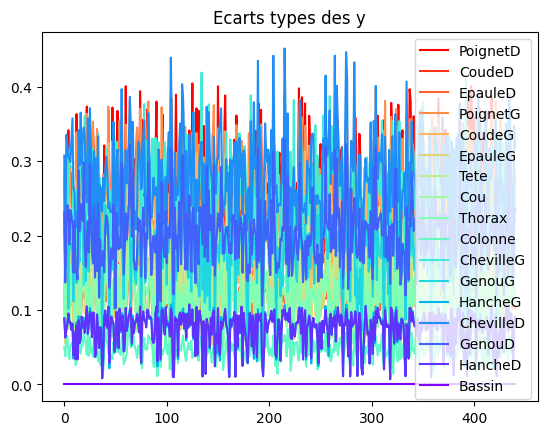

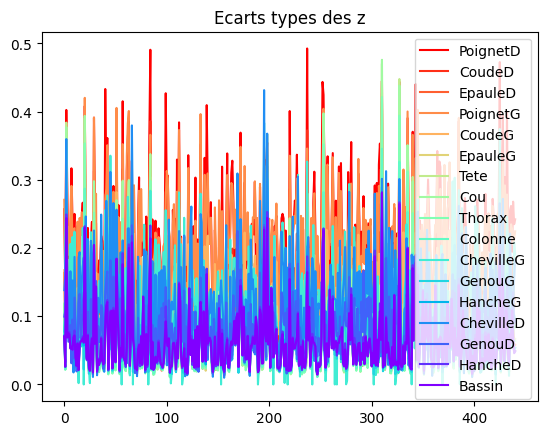

In [19]:
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, 17)]

for i in range(16,-1,-1):
    plt.plot(ecarts_types_x[i],label=parties_du_corps[i],color=colors[i])
plt.title("Ecarts types des x")
plt.legend()
plt.show()
for i in range(16,-1,-1):
    plt.plot(ecarts_types_y[i],label=parties_du_corps[i],color=colors[i])
plt.title("Ecarts types des y")
plt.legend()
plt.show()
for i in range(16,-1,-1):
    plt.plot(ecarts_types_z[i],label=parties_du_corps[i],color=colors[i])
plt.title("Ecarts types des z")
plt.legend()
plt.show()

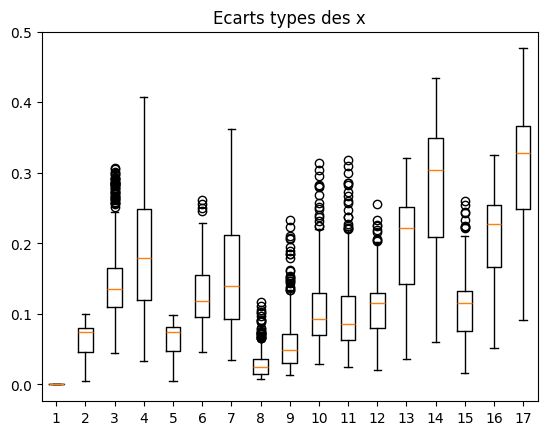

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


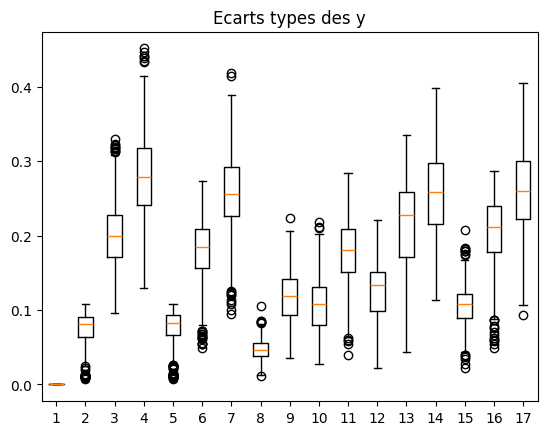

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


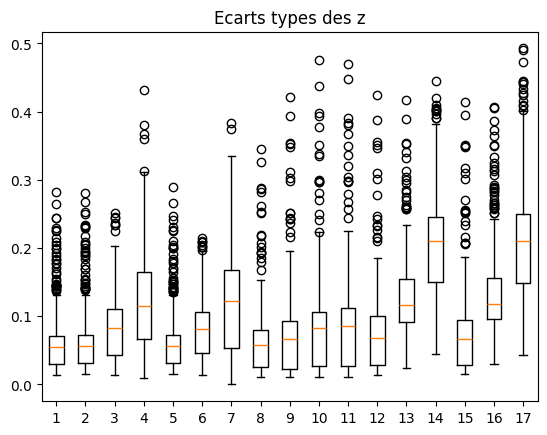

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


In [20]:
plt.boxplot(ecarts_types_x)
plt.title("Ecarts types des x")
plt.show()
print(affichage_partie_du_corps)
plt.title("Ecarts types des y")
plt.boxplot(ecarts_types_y)
plt.show()
print(affichage_partie_du_corps)
plt.title("Ecarts types des z")
plt.boxplot(ecarts_types_z)
plt.show()
print(affichage_partie_du_corps)

On voit que certaines parties du corps comme les poignets et les chevilles sont plus dispersés autour de la moyenne que d'autres comme le thorax et la colonne sur les axes x et y. On peut aussi voir que les parties du corps restent un peu plus stables sur la hauteur (l'axe z) que dans les autres directions et qu'il y a moins de différences entre elles que sur les autres axes. On remarque que le bassin ne bouge pas dans les axes x et y.

# Correlation

On crée un dataframe contenant toutes nos videos pour la suite.

In [21]:
all_datas=pd.concat(datas)

Maintenant on regarde quelles variables sont corrélées  
Pour les x

In [22]:
all_datas.apply(lambda col: col.str[0]).corr()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
Bassin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HancheD,NaN,1.000000,0.614315,0.415959,-0.999194,-0.607512,-0.375367,0.025406,0.036999,0.096443,0.092398,-0.697251,-0.762088,-0.642046,0.699676,0.744119,0.625565
GenouD,NaN,0.614315,1.000000,0.776801,-0.623044,-0.225834,-0.235503,0.095321,0.124188,0.283322,0.265251,-0.338381,-0.355081,-0.236900,0.466776,0.519184,0.490564
ChevilleD,NaN,0.415959,0.776801,1.000000,-0.421689,-0.292587,-0.248843,-0.080297,-0.055531,0.021568,0.019766,-0.296958,-0.264835,-0.188312,0.199627,0.262918,0.242461
HancheG,NaN,-0.999194,-0.623044,-0.421689,1.000000,0.599267,0.370458,-0.044417,-0.056271,-0.114256,-0.110296,0.684276,0.754084,0.634666,-0.712949,-0.753084,-0.633889
GenouG,NaN,-0.607512,-0.225834,-0.292587,0.599267,1.000000,0.779184,0.051229,0.069604,0.170273,0.159284,0.434640,0.467094,0.431602,-0.325611,-0.332615,-0.218211
ChevilleG,NaN,-0.375367,-0.235503,-0.248843,0.370458,0.779184,1.000000,-0.111018,-0.090250,-0.029559,-0.027550,0.145941,0.182958,0.164321,-0.258998,-0.234698,-0.163289
Colonne,NaN,0.025406,0.095321,-0.080297,-0.044417,0.051229,-0.111018,1.000000,0.996035,0.852459,0.873999,0.662993,0.354951,0.274930,0.697268,0.418827,0.349091
Thorax,NaN,0.036999,0.124188,-0.055531,-0.056271,0.069604,-0.090250,0.996035,1.000000,0.882467,0.903757,0.653585,0.337792,0.260551,0.706603,0.424424,0.356651
Cou,NaN,0.096443,0.283322,0.021568,-0.114256,0.170273,-0.029559,0.852459,0.882467,1.000000,0.994971,0.511346,0.254265,0.231241,0.657755,0.444892,0.418591


<Axes: >

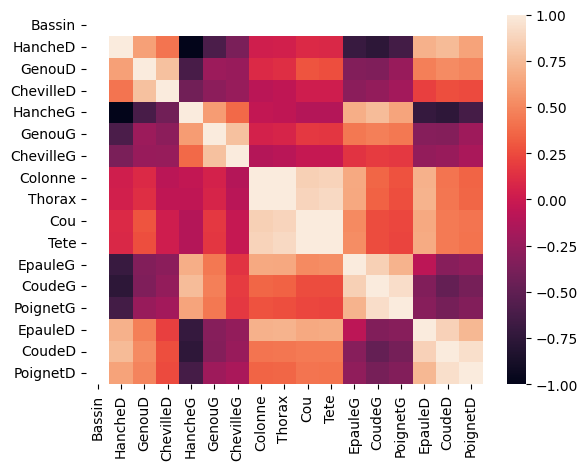

In [23]:
sns.heatmap(all_datas.apply(lambda col: col.str[0]).corr(),vmin=-1, vmax=1)

On peut voir les parties du bras sont corrélées entre elles de même pour les parties des jambes. De plus les hanches sont inversement corrélées, alors que les parties des bras (poignets,coudes et épaules) et les parties des jambes (surtout les hanches mais aussi les chevilles et les genoux) sont corrélées. Le thorax, la tête, la colonne et le cou sont aussi corrélés.

Pour les y

In [24]:
all_datas.apply(lambda col: col.str[1]).corr()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
Bassin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HancheD,NaN,1.000000,0.566444,0.594894,-0.991215,-0.484690,-0.536201,-0.169125,-0.139874,-0.199442,-0.198165,-0.635876,-0.810072,-0.632735,0.494057,0.799687,0.602939
GenouD,NaN,0.566444,1.000000,0.813340,-0.546850,0.080370,-0.121780,-0.305083,-0.263194,-0.169846,-0.340293,-0.497312,-0.437424,-0.180768,0.145267,0.506930,0.549374
ChevilleD,NaN,0.594894,0.813340,1.000000,-0.570453,-0.174930,-0.221533,-0.326972,-0.223909,-0.241041,-0.235371,-0.474551,-0.480103,-0.350096,0.156184,0.490785,0.396485
HancheG,NaN,-0.991215,-0.546850,-0.570453,1.000000,0.509233,0.565573,0.157499,0.143577,0.187560,0.207489,0.637122,0.816296,0.622571,-0.494204,-0.797186,-0.615867
GenouG,NaN,-0.484690,0.080370,-0.174930,0.509233,1.000000,0.830392,-0.088345,-0.083730,0.069008,-0.106384,0.217036,0.463901,0.513443,-0.367267,-0.387587,-0.126319
ChevilleG,NaN,-0.536201,-0.121780,-0.221533,0.565573,0.830392,1.000000,-0.106657,-0.051194,0.005995,-0.019558,0.252924,0.459673,0.393533,-0.383057,-0.452090,-0.310930
Colonne,NaN,-0.169125,-0.305083,-0.326972,0.157499,-0.088345,-0.106657,1.000000,0.938578,0.914745,0.891679,0.803114,0.324932,0.137064,0.708379,0.035809,-0.101591
Thorax,NaN,-0.139874,-0.263194,-0.223909,0.143577,-0.083730,-0.051194,0.938578,1.000000,0.935480,0.970027,0.819240,0.317599,0.094785,0.749952,0.046578,-0.137240
Cou,NaN,-0.199442,-0.169846,-0.241041,0.187560,0.069008,0.005995,0.914745,0.935480,1.000000,0.889324,0.806089,0.366493,0.245233,0.678757,0.020388,-0.033210


<Axes: >

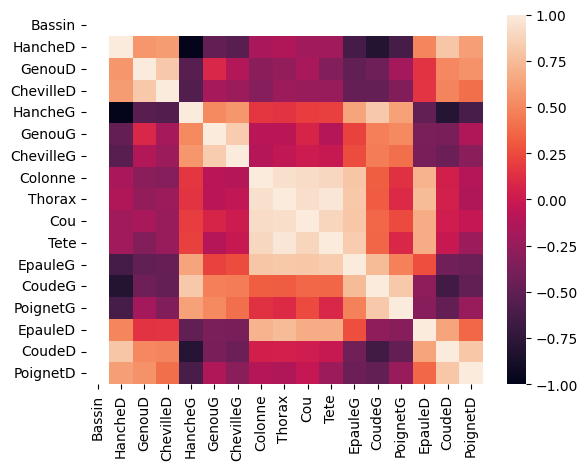

In [25]:
sns.heatmap(all_datas.apply(lambda col: col.str[1]).corr(),vmin=-1, vmax=1)

On retrouve les mêmes observations que sur l'axe x

Pour les z

In [26]:
all_datas.apply(lambda col: col.str[2]).corr()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
Bassin,1.000000,0.985146,0.359066,0.010466,0.983513,0.281042,-0.044716,0.938649,0.786606,0.616569,0.612206,0.750046,0.397330,0.231313,0.760910,0.420110,0.253632
HancheD,0.985146,1.000000,0.429857,0.073662,0.938071,0.182439,-0.126020,0.928073,0.783784,0.622630,0.617089,0.720518,0.369290,0.214157,0.781373,0.458043,0.290704
GenouD,0.359066,0.429857,1.000000,0.772519,0.272165,0.010866,-0.128849,0.307117,0.223587,0.170156,0.159222,0.187692,0.084382,0.060217,0.244461,0.163299,0.124147
ChevilleD,0.010466,0.073662,0.772519,1.000000,-0.056653,-0.092780,-0.121680,-0.054211,-0.116475,-0.103598,-0.116514,-0.127649,-0.047788,-0.012646,-0.091146,-0.013199,0.019494
HancheG,0.983513,0.938071,0.272165,-0.056653,1.000000,0.374978,0.042322,0.920967,0.766495,0.593538,0.590754,0.759034,0.412651,0.238972,0.716494,0.364236,0.202711
GenouG,0.281042,0.182439,0.010866,-0.092780,0.374978,1.000000,0.792036,0.212346,0.110152,0.031418,0.030677,0.156135,0.077001,0.023573,0.075080,-0.005659,-0.042967
ChevilleG,-0.044716,-0.126020,-0.128849,-0.121680,0.042322,0.792036,1.000000,-0.126038,-0.198729,-0.204313,-0.211837,-0.155896,-0.049836,-0.019218,-0.211970,-0.098992,-0.062405
Colonne,0.938649,0.928073,0.307117,-0.054211,0.920967,0.212346,-0.126038,1.000000,0.948890,0.803926,0.805711,0.907546,0.472839,0.276828,0.911235,0.487900,0.290113
Thorax,0.786606,0.783784,0.223587,-0.116475,0.766495,0.110152,-0.198729,0.948890,1.000000,0.909787,0.915610,0.949682,0.489668,0.292769,0.957953,0.515170,0.312496
Cou,0.616569,0.622630,0.170156,-0.103598,0.593538,0.031418,-0.204313,0.803926,0.909787,1.000000,0.991784,0.836178,0.413841,0.265949,0.863719,0.479197,0.319132


<Axes: >

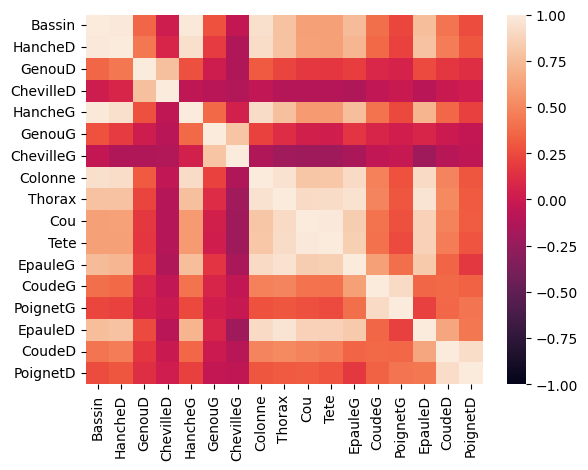

In [27]:
sns.heatmap(all_datas.apply(lambda col: col.str[2]).corr(),vmin=-1, vmax=1)

Sur l'axe z on conserve la corrélation entre les hanches gauches et droites, la correlation entre les parties du bras (les poignets et les coudes), la corrélation entre le thorax
la tete, la colonne, le coude auquels vient s'ajouter les deux épaules. Mais on perd le corrélation dans les jambes les chevilles les genoux et les hanches.

# Vitesse et accélération

In [28]:
vitesse_x=all_datas.apply(lambda col: col.str[0]).diff()
vitesse_y=all_datas.apply(lambda col: col.str[1]).diff()
vitesse_z=all_datas.apply(lambda col: col.str[2]).diff()

In [29]:
vitesse_x.describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,384445.0,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05
mean,0.0,5.669127e-08,5.794230e-08,5.661278e-07,-4.240526e-08,-2.166494e-07,-1.391299e-07,-3.283826e-09,9.754341e-10,-1.920649e-07,-1.496514e-07,-7.668384e-08,-4.064700e-07,-4.906855e-07,1.058827e-07,4.159151e-07,6.435686e-07
std,0.0,1.093071e-02,2.590196e-02,3.792224e-02,1.086853e-02,2.371102e-02,3.269126e-02,5.400673e-03,1.075481e-02,1.660697e-02,1.632956e-02,1.726602e-02,3.380603e-02,4.801606e-02,1.700911e-02,3.291240e-02,4.796698e-02
min,0.0,-7.437808e-01,-1.342009e+00,-1.580072e+00,-6.138333e-01,-1.180416e+00,-1.609821e+00,-4.085254e-01,-8.577361e-01,-8.244344e-01,-8.030173e-01,-8.600415e-01,-1.100246e+00,-1.306808e+00,-8.590412e-01,-1.164298e+00,-1.326252e+00
25%,0.0,-2.249509e-03,-6.520752e-03,-8.231685e-03,-2.309576e-03,-6.431885e-03,-7.668450e-03,-1.965576e-03,-3.827140e-03,-5.528562e-03,-5.306885e-03,-5.379640e-03,-9.370118e-03,-1.235789e-02,-4.995361e-03,-9.098142e-03,-1.240674e-02
50%,0.0,2.588332e-05,1.171604e-05,2.246071e-05,-2.978742e-05,-1.367182e-05,3.588945e-05,-9.765849e-06,-1.489371e-05,2.563000e-05,2.392381e-05,-7.470697e-05,-9.497255e-05,-1.323223e-04,1.977384e-05,2.709776e-05,1.076683e-04
75%,0.0,2.327144e-03,6.519776e-03,8.056395e-03,2.209472e-03,6.348640e-03,7.757321e-03,1.935059e-03,3.776364e-03,5.660161e-03,5.497798e-03,4.918948e-03,8.499265e-03,1.168504e-02,5.047366e-03,9.203374e-03,1.295727e-02
max,0.0,7.541746e-01,1.343243e+00,1.582407e+00,6.114553e-01,1.036008e+00,1.300464e+00,2.825176e-01,5.785681e-01,8.349534e-01,8.486279e-01,6.267239e-01,1.054530e+00,1.387085e+00,8.459881e-01,1.262607e+00,1.299775e+00


In [30]:
vitesse_y.describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,384445.0,3.844450e+05,384445.000000,384445.000000,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,384445.000000,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05
mean,0.0,-4.648936e-07,-0.000001,-0.000003,4.870293e-07,-1.781749e-07,-7.931694e-07,3.388634e-07,8.013112e-07,8.152288e-07,0.000001,8.746775e-07,4.359046e-07,6.902536e-07,3.629480e-07,-5.476243e-07,-1.524229e-07
std,0.0,1.390586e-02,0.049747,0.077456,1.406954e-02,4.479987e-02,7.233799e-02,1.382777e-02,3.049153e-02,3.155486e-02,0.042911,2.815950e-02,4.869924e-02,7.255000e-02,2.604750e-02,4.686237e-02,6.763827e-02
min,0.0,-3.424196e-01,-1.183358,-1.968057,-3.757175e-01,-1.163063e+00,-2.014263e+00,-5.339310e-01,-1.061505e+00,-1.129119e+00,-1.132313,-9.082986e-01,-8.984781e-01,-1.271536e+00,-8.502595e-01,-1.164178e+00,-1.113940e+00
25%,0.0,-3.132708e-03,-0.017387,-0.028211,-3.105633e-03,-1.503646e-02,-2.642846e-02,-4.835062e-03,-1.068509e-02,-1.107285e-02,-0.013546,-9.264648e-03,-1.373390e-02,-2.185988e-02,-9.154558e-03,-1.506746e-02,-2.222806e-02
50%,0.0,2.976507e-05,-0.000043,0.000221,-2.143160e-05,1.786053e-04,-7.781386e-05,3.103726e-05,-1.057982e-05,-1.385808e-05,0.000124,-7.326016e-05,3.315508e-04,9.480715e-04,7.979572e-05,-6.876886e-05,-1.437068e-04
75%,0.0,3.252689e-03,0.017033,0.028605,3.024425e-03,1.555815e-02,2.630135e-02,4.885171e-03,1.062122e-02,1.103733e-02,0.013856,8.965492e-03,1.452886e-02,2.432992e-02,9.327896e-03,1.485270e-02,2.192209e-02
max,0.0,3.282329e-01,1.073446,2.031871,3.557214e-01,1.133831e+00,2.049246e+00,5.022450e-01,9.452118e-01,1.049211e+00,1.183384,8.682650e-01,9.212785e-01,1.130110e+00,8.820608e-01,1.009043e+00,1.082458e+00


In [31]:
vitesse_z.describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,3.844450e+05,3.844450e+05,3.844450e+05,384445.000000,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05,3.844450e+05
mean,-1.583941e-07,-1.429524e-07,6.081209e-07,0.000001,-1.760141e-07,-1.808481e-07,-4.801066e-21,-2.561233e-07,-3.755779e-07,-4.629529e-07,-5.019984e-07,-3.375520e-07,2.797912e-07,9.910074e-07,-3.610301e-07,4.793905e-07,9.008560e-07
std,1.944600e-02,1.979434e-02,2.765216e-02,0.034852,2.017888e-02,2.647545e-02,3.407825e-02,1.969761e-02,2.238794e-02,2.584906e-02,2.626176e-02,2.324399e-02,3.511397e-02,5.468263e-02,2.357165e-02,3.179469e-02,4.336518e-02
min,-1.184142e+00,-1.204957e+00,-1.533759e+00,-1.513210,-1.207269e+00,-1.534219e+00,-1.507655e+00,-1.330792e+00,-1.459723e+00,-1.518474e+00,-1.841668e+00,-1.438343e+00,-1.459553e+00,-1.492344e+00,-1.451760e+00,-1.450653e+00,-1.487383e+00
25%,-7.371843e-03,-7.688224e-03,-5.992949e-03,0.000000,-7.700980e-03,-6.130874e-03,-7.473230e-04,-6.252885e-03,-5.610347e-03,-6.181240e-03,-5.961418e-03,-6.093740e-03,-8.908153e-03,-1.140153e-02,-6.167173e-03,-8.897483e-03,-1.135111e-02
50%,9.536743e-06,0.000000e+00,0.000000e+00,0.000000,2.920628e-06,-7.092953e-06,0.000000e+00,2.533197e-05,3.039837e-05,-9.536743e-06,-3.218651e-06,3.993511e-05,-9.107590e-05,0.000000e+00,-5.125999e-06,-1.171827e-04,-5.125999e-06
75%,7.473409e-03,7.753670e-03,6.046146e-03,0.000000,7.759035e-03,6.180912e-03,9.137988e-04,6.320655e-03,5.685806e-03,6.154299e-03,5.935669e-03,6.232142e-03,8.615375e-03,1.112270e-02,6.225586e-03,8.510590e-03,1.079392e-02
max,1.457418e+00,1.255682e+00,1.539607e+00,1.584348,1.870883e+00,1.541803e+00,1.562741e+00,1.563720e+00,1.585160e+00,1.899441e+00,1.637422e+00,1.473208e+00,1.498886e+00,1.560158e+00,1.847819e+00,1.500636e+00,1.579047e+00


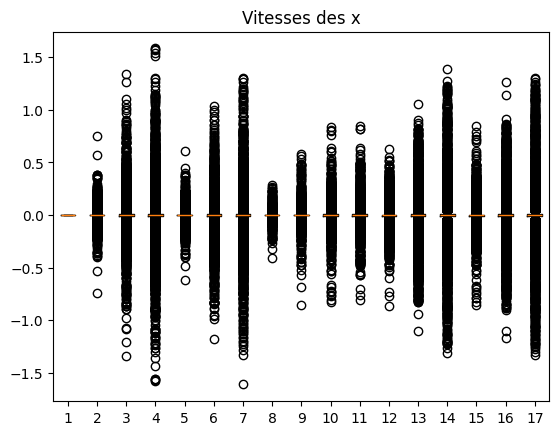

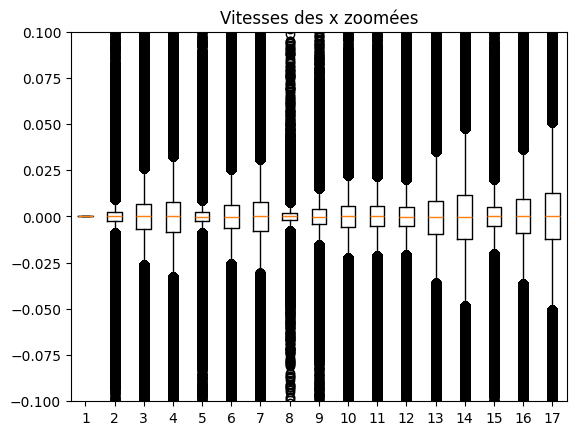

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


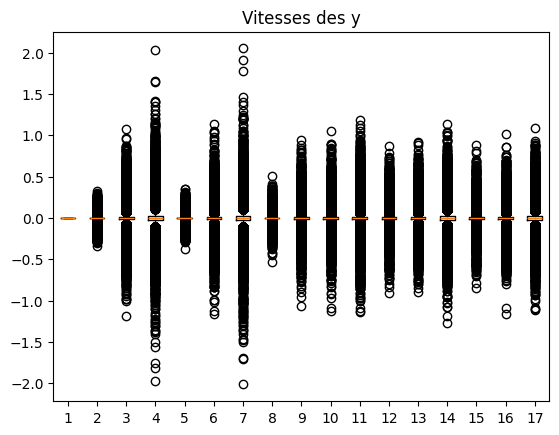

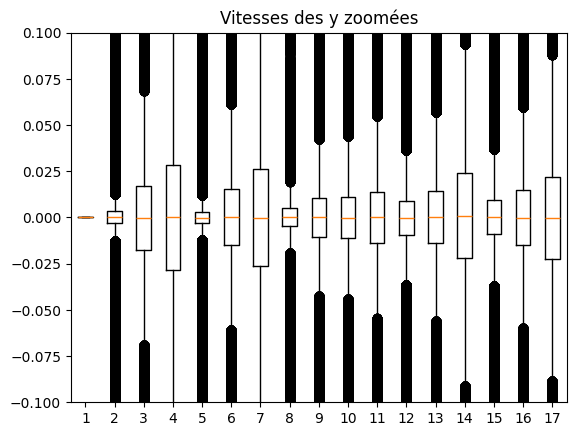

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


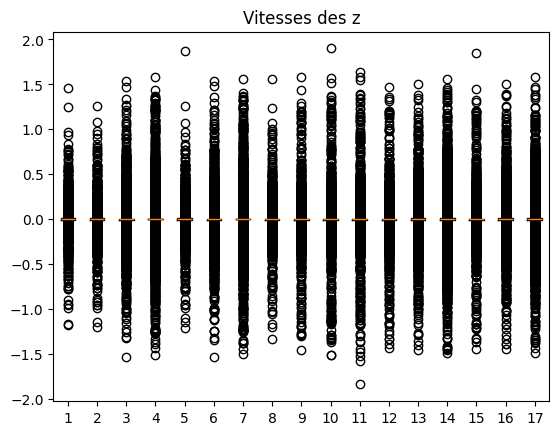

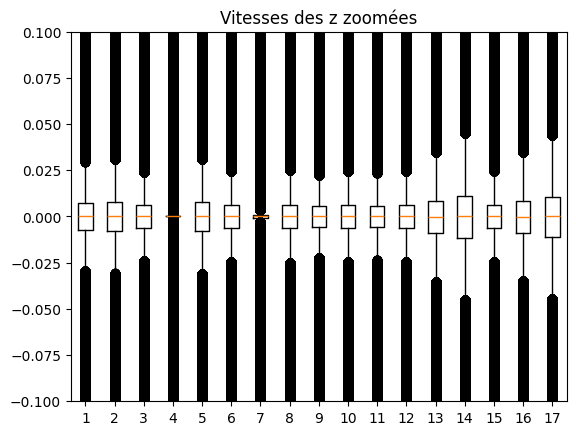

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


In [32]:
plt.boxplot(vitesse_x.dropna())
plt.title("Vitesses des x")
plt.show()
plt.boxplot(vitesse_x.dropna())
plt.title("Vitesses des x zoomées")
plt.ylim(-0.1,0.1)
plt.show()
print(affichage_partie_du_corps)
plt.boxplot(vitesse_y.dropna())
plt.title("Vitesses des y")
plt.show()
plt.boxplot(vitesse_y.dropna())
plt.title("Vitesses des y zoomées")
plt.ylim(-0.1,0.1)
plt.show()
print(affichage_partie_du_corps)
plt.boxplot(vitesse_z.dropna())
plt.title("Vitesses des z")
plt.show()
plt.boxplot(vitesse_z.dropna())
plt.title("Vitesses des z zoomées")
plt.ylim(-0.1,0.1)
plt.show()
print(affichage_partie_du_corps)

In [33]:
acceleration_x=vitesse_x.diff()
acceleration_y=vitesse_y.diff()
acceleration_z=vitesse_z.diff()

In [34]:
acceleration_x.describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,384444.0,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05
mean,0.0,9.358711e-09,2.029489e-08,1.927501e-08,-9.358730e-09,3.145523e-08,8.349492e-08,-9.544770e-10,-3.651510e-10,1.041537e-10,-1.936876e-10,-9.808330e-09,-4.945123e-08,-1.012382e-07,8.032101e-09,1.766582e-08,8.216387e-08
std,0.0,1.393465e-02,3.387653e-02,4.977861e-02,1.379755e-02,3.164986e-02,4.468014e-02,6.981112e-03,1.382824e-02,1.950897e-02,1.932527e-02,2.081486e-02,4.120073e-02,6.018713e-02,2.178810e-02,4.047026e-02,5.827929e-02
min,0.0,-7.536274e-01,-2.685252e+00,-3.131751e+00,-1.225289e+00,-1.769570e+00,-2.383282e+00,-6.206682e-01,-1.305974e+00,-1.237238e+00,-1.267503e+00,-1.315867e+00,-1.736477e+00,-2.281673e+00,-1.330801e+00,-2.309302e+00,-2.600562e+00
25%,0.0,-2.515138e-03,-4.720775e-03,-5.491439e-03,-2.471432e-03,-4.819897e-03,-5.359926e-03,-2.060790e-03,-3.894284e-03,-5.237788e-03,-4.514396e-03,-4.922852e-03,-6.811559e-03,-7.411104e-03,-4.784915e-03,-6.220698e-03,-7.050380e-03
50%,0.0,-1.123035e-05,6.578863e-06,2.734084e-05,5.133450e-06,6.109476e-06,-1.303852e-07,-5.371054e-06,-1.098961e-05,1.758337e-05,5.859882e-06,1.086295e-05,-1.318555e-05,2.205372e-06,-2.074987e-05,-5.517900e-05,-6.784499e-05
75%,0.0,2.500243e-03,4.858155e-03,5.566230e-03,2.490057e-03,4.908203e-03,5.366459e-03,2.047364e-03,3.882080e-03,5.294191e-03,4.612550e-03,4.937977e-03,6.778568e-03,7.481009e-03,4.730228e-03,6.111324e-03,6.928243e-03
max,0.0,1.497955e+00,1.702711e+00,3.155217e+00,7.532183e-01,1.962562e+00,2.633816e+00,5.660791e-01,1.256886e+00,1.659388e+00,1.256527e+00,1.242291e+00,1.625668e+00,2.410493e+00,1.631467e+00,2.426905e+00,2.373502e+00


In [35]:
acceleration_y.describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,384444.0,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05
mean,0.0,-6.892025e-09,2.737182e-08,7.146064e-08,1.038117e-08,7.406353e-08,1.776185e-07,-9.489004e-09,-2.133467e-08,-3.587618e-08,-3.220441e-08,-9.249252e-09,1.944150e-08,-5.176191e-08,-3.184291e-08,-4.022999e-08,-1.056218e-07
std,0.0,1.677669e-02,6.409973e-02,1.023796e-01,1.687314e-02,5.787915e-02,9.723658e-02,1.892795e-02,4.184645e-02,4.387902e-02,5.806740e-02,3.763855e-02,6.145564e-02,9.811726e-02,3.570113e-02,5.893904e-02,8.871038e-02
min,0.0,-5.935542e-01,-2.049821e+00,-3.999928e+00,-5.394065e-01,-2.260622e+00,-4.063509e+00,-9.146060e-01,-1.633038e+00,-1.793888e+00,-2.077074e+00,-1.455515e+00,-1.645121e+00,-2.059873e+00,-1.445894e+00,-1.418220e+00,-1.764432e+00
25%,0.0,-3.086429e-03,-2.042232e-02,-3.348943e-02,-3.129143e-03,-1.900176e-02,-3.233273e-02,-6.154548e-03,-1.346003e-02,-1.391201e-02,-1.741329e-02,-1.109040e-02,-1.672596e-02,-2.839513e-02,-1.123579e-02,-1.765471e-02,-2.633554e-02
50%,0.0,9.479374e-05,1.313761e-04,7.419550e-05,-7.935986e-05,-3.781822e-05,6.518513e-05,4.984764e-05,5.917251e-05,1.493208e-04,-4.319102e-05,-2.654269e-05,-6.364286e-05,-1.629740e-04,5.651824e-05,1.746416e-04,2.452405e-04
75%,0.0,3.232419e-03,2.070224e-02,3.387992e-02,2.982994e-03,1.904722e-02,3.252074e-02,6.205845e-03,1.350627e-02,1.411942e-02,1.742648e-02,1.103172e-02,1.663110e-02,2.797295e-02,1.133944e-02,1.790181e-02,2.699454e-02
max,0.0,5.197403e-01,1.755510e+00,3.334082e+00,5.964374e-01,2.037781e+00,3.391134e+00,7.846395e-01,1.736566e+00,1.901402e+00,2.259875e+00,1.562922e+00,1.785719e+00,2.108537e+00,1.458419e+00,1.787736e+00,1.755857e+00


In [36]:
acceleration_z.describe()

,Bassin,HancheD,GenouD,ChevilleD,HancheG,GenouG,ChevilleG,Colonne,Thorax,Cou,Tete,EpauleG,CoudeG,PoignetG,EpauleD,CoudeD,PoignetD
count,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05,3.844440e+05
mean,-1.870603e-08,-1.503233e-08,-2.002070e-08,6.143460e-08,-2.103676e-08,-1.258043e-08,-1.031059e-20,-7.024605e-09,5.702724e-09,2.510240e-08,2.591730e-08,1.925921e-09,-2.493372e-08,-5.414410e-08,3.729050e-09,-2.562815e-08,-5.351726e-08
std,2.799396e-02,2.863691e-02,4.095779e-02,5.017618e-02,2.924767e-02,3.847965e-02,4.857173e-02,2.824865e-02,3.247212e-02,3.815567e-02,3.820428e-02,3.383876e-02,5.082130e-02,7.954408e-02,3.437304e-02,4.445433e-02,5.839666e-02
min,-2.419167e+00,-2.460639e+00,-3.073367e+00,-2.874918e+00,-2.404402e+00,-3.076022e+00,-2.854774e+00,-2.446241e+00,-2.548958e+00,-3.018170e+00,-3.123949e+00,-2.645998e+00,-2.689282e+00,-2.887806e+00,-2.626608e+00,-2.763539e+00,-2.754583e+00
25%,-1.019317e-02,-1.053546e-02,-7.458247e-03,-3.681332e-05,-1.038750e-02,-7.571042e-03,-1.255877e-03,-8.294702e-03,-6.957173e-03,-7.673621e-03,-7.319957e-03,-7.547289e-03,-8.772746e-03,-9.273678e-03,-7.551819e-03,-8.367926e-03,-8.586481e-03
50%,-2.289414e-04,-1.893044e-04,-9.715557e-06,0.000000e+00,-1.887679e-04,-7.152557e-05,0.000000e+00,-1.100004e-04,7.629395e-06,4.470348e-06,3.719330e-05,1.543760e-05,2.145767e-05,1.549721e-05,2.503395e-06,1.740456e-05,0.000000e+00
75%,9.788260e-03,1.000959e-02,7.333905e-03,3.542453e-04,9.888560e-03,7.439539e-03,1.746833e-03,8.117095e-03,7.016957e-03,7.740527e-03,7.429600e-03,7.602215e-03,8.779898e-03,9.348109e-03,7.586718e-03,8.350030e-03,8.743316e-03
max,2.116170e+00,2.098047e+00,2.664644e+00,2.841623e+00,2.123623e+00,2.711141e+00,2.824332e+00,2.405312e+00,2.682490e+00,3.135235e+00,2.958769e+00,2.666399e+00,2.704776e+00,2.893647e+00,3.013202e+00,2.771764e+00,2.774773e+00


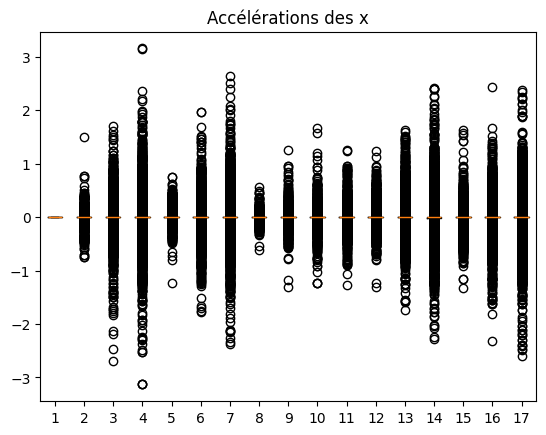

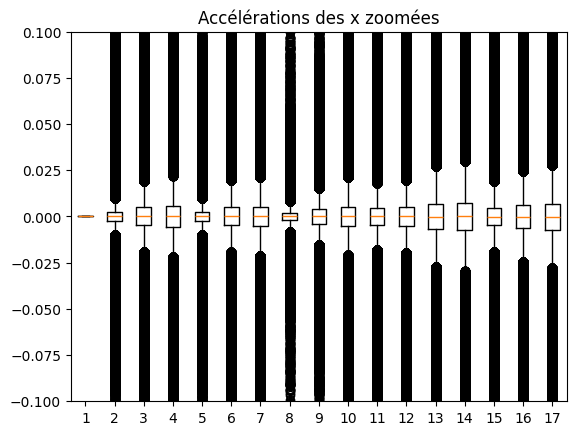

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


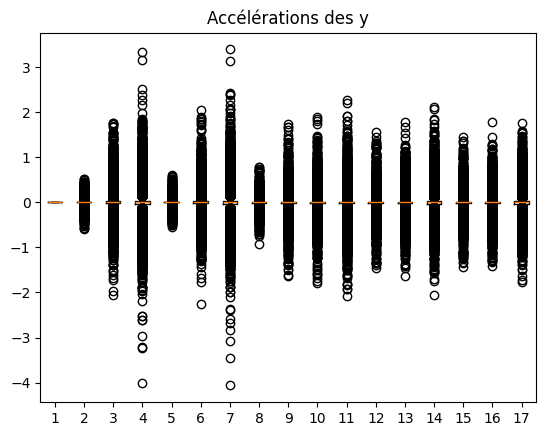

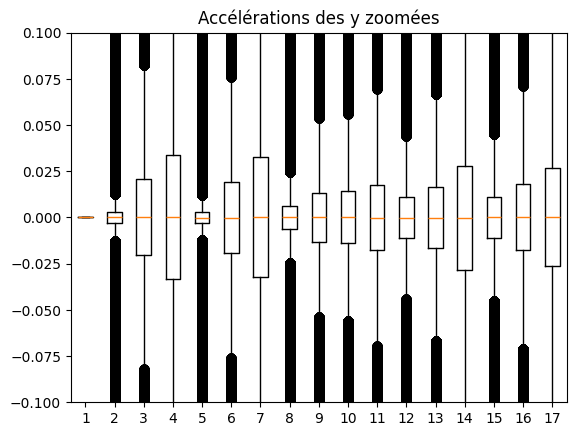

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


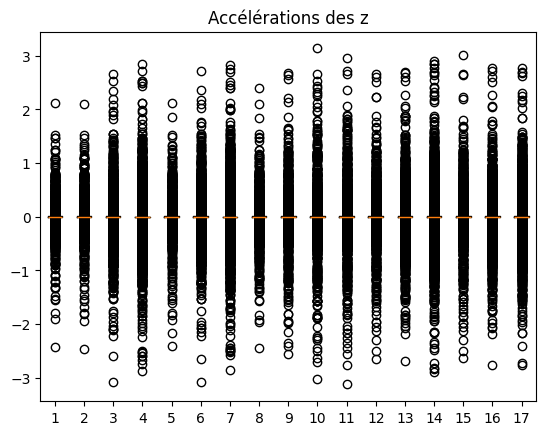

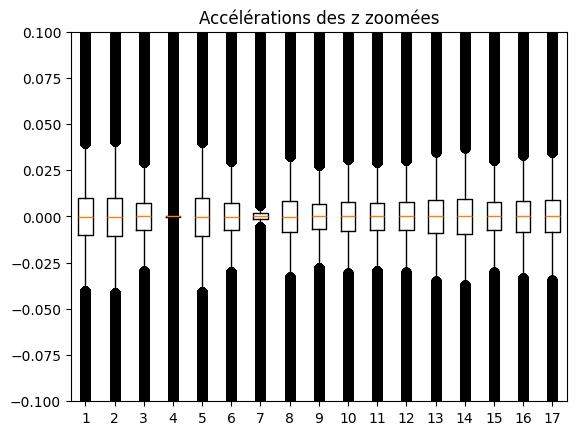

1 : Bassin, 2 : HancheD, 3 : GenouD, 4 : ChevilleD, 5 : HancheG, 6 : GenouG, 7 : ChevilleG, 8 : Colonne, 9 : Thorax, 10 : Cou, 11 : Tete, 12 : EpauleG, 13 : CoudeG, 14 : PoignetG, 15 : EpauleD, 16 : CoudeD, 17 : PoignetD, 


In [37]:
plt.boxplot(acceleration_x.dropna())
plt.title("Accélérations des x")
plt.show()
plt.boxplot(acceleration_x.dropna())
plt.title("Accélérations des x zoomées")
plt.ylim(-0.1,0.1)
plt.show()
print(affichage_partie_du_corps)
plt.boxplot(acceleration_y.dropna())
plt.title("Accélérations des y")
plt.show()
plt.boxplot(acceleration_y.dropna())
plt.title("Accélérations des y zoomées")
plt.ylim(-0.1,0.1)
plt.show()
print(affichage_partie_du_corps)
plt.boxplot(acceleration_z.dropna())
plt.title("Accélérations des z")
plt.show()
plt.boxplot(acceleration_z.dropna())
plt.title("Accélérations des z zoomées")
plt.ylim(-0.1,0.1)
plt.show()
print(affichage_partie_du_corps)

On remarque que les parties du corps qui vont le plus vite ou qui accélèrent le plus sont les extrémités du corps (poignets,coudes,chevilles et genoux) sur l'axe x alors que notamment le bassin, les hanches et la colonne sont plus stables sur cet axe. On voit qu'il y a beaucoup plus de mouvements sur l'axe y, les extrémités bougent toujours le plus, mais les parties comme le thorax, le coup et la tête se mettent aussi à bouger de façon significative, et le bassin, les hanches et la colonne restent les plus stables. Enfin sur l'axe z les parties du corps bougent toutes a peu près de la même façon sauf les chevilles qui restent stables.